In [139]:
import pandas as pd

In [140]:
us = pd.read_csv('../covid-19-data/us.csv')

In [141]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams['figure.max_open_warning'] = 0

In [201]:
cases = us['cases'].diff().fillna(0).rolling(7).mean()

In [202]:
final_date = us['date'][len(us['date'])-1]
print(f'final date: {final_date}')

final date: 2021-07-27


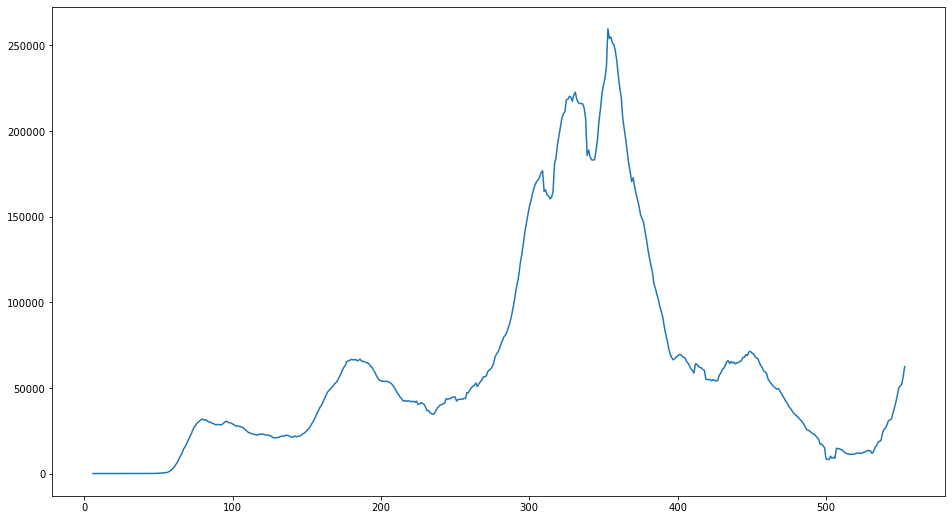

In [203]:
p = plt.plot(cases)

In [204]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial


In [218]:
window = 14
order = 2


In [223]:
y = np.array(cases[14:])
x = np.array(range(window))
smooth_y = np.zeros(len(y))
y_prime = np.zeros(len(y))
y_prime2 = np.zeros(len(y))
center = window // 2
for i in range(0, len(y) - window):
    y_window = y[i:(i + window)]
    p = Polynomial.fit(x, y_window, order)
    smooth_y[i + center] = p(center)
    y_prime[i + center] = p.deriv(1)(center)
    y_prime2[i + center] = p.deriv(2)(center)
offset = len(y) - window
for i in range(center, window):
    smooth_y[i + offset] = p(i)
    y_prime[i + offset] = p.deriv(1)(i)
    y_prime2[i + offset] = p.deriv(2)(i)



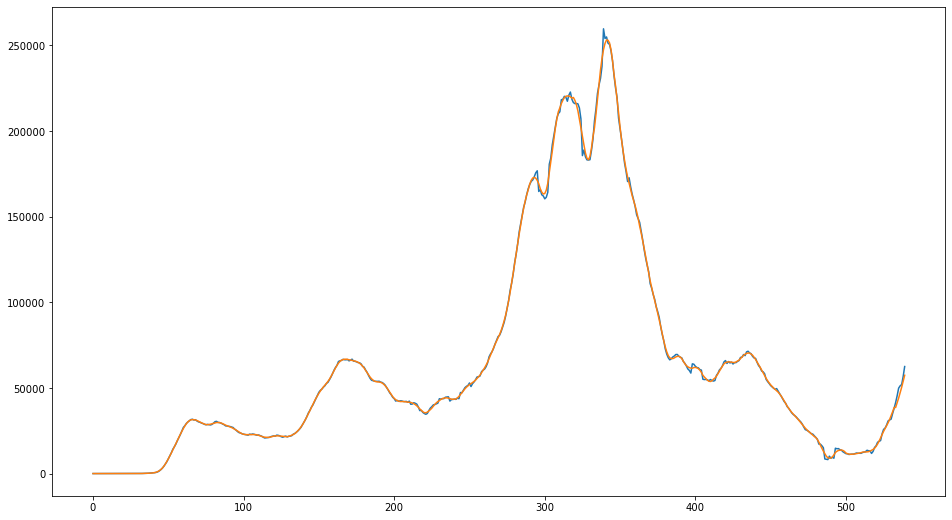

In [224]:
plt.plot(y)
plt.plot(smooth_y)

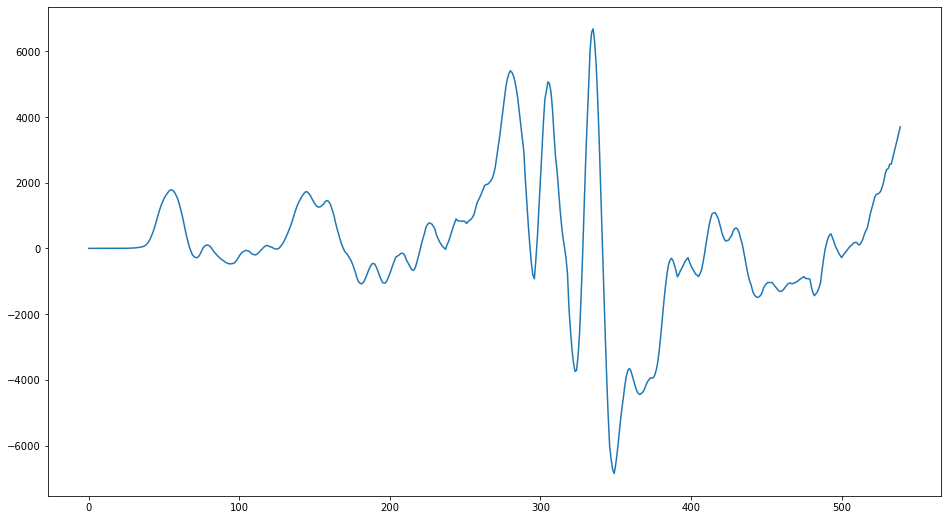

In [225]:
plt.plot(y_prime)
#plt.plot(range(len(cases[50:])),cases[50:].diff())

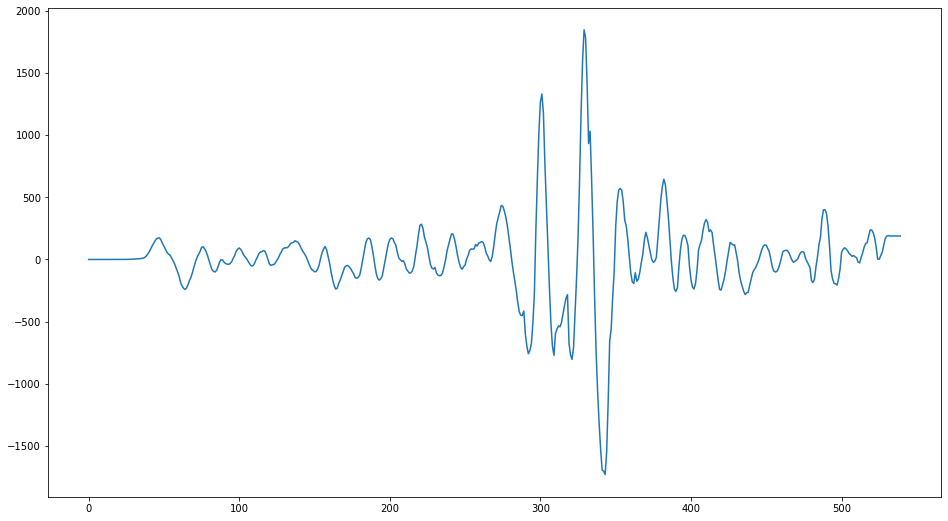

In [226]:
plt.plot(y_prime2)

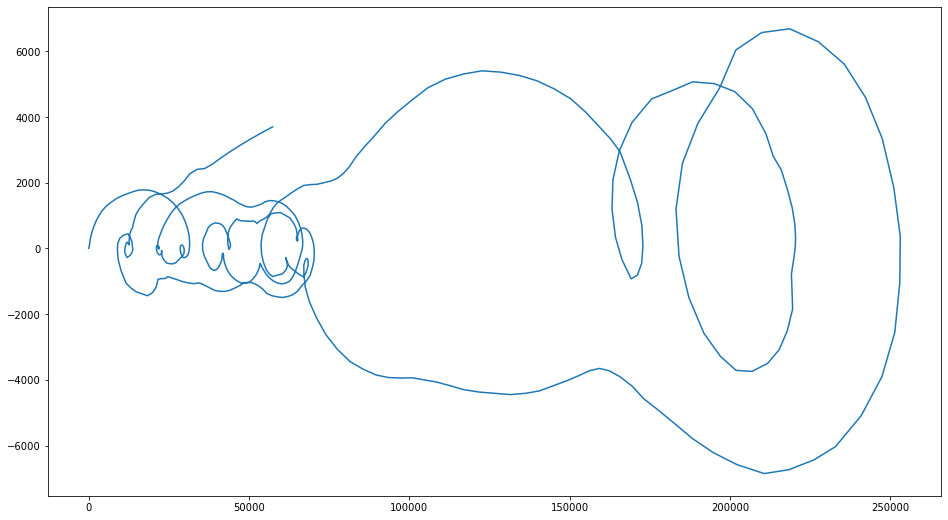

In [222]:
plt.plot(smooth_y, y_prime)